In [1]:
#load Library
import pandas as pd
import matplotlib as plt

In [2]:
#Load Dataset
Dataset = pd.read_csv("survey.csv")
Dataset.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
#Cleaning of Age dataset
dataframe1 = Dataset[Dataset['Age'] > 0]
dataframe2 = dataframe1[dataframe1['Age'] < 100]

In [14]:
#Group by Age
dataframe2.loc[dataframe2['Age'].between(0, 13, 'both'), 'AgeGroup'] = 'Kids'
dataframe2.loc[dataframe2['Age'].between(13, 19, 'right'), 'AgeGroup'] = 'Teenegers'
dataframe2.loc[dataframe2['Age'].between(19, 30, 'right'), 'AgeGroup'] = 'Adults'
dataframe2.loc[dataframe2['Age'].between(30, 58, 'right'), 'AgeGroup'] = 'Middle-Age'
dataframe2.loc[dataframe2['Age'].between(58, 100, 'right'), 'AgeGroup'] = 'Senior-Citizen'

In [5]:
#Group by Gender
genders_male = ["M", "Male", "male", "m", 'Male-ish', 'maile',
                'something kinda male?', 'Cis Male', 'Mal', 'Male (CIS)',
                'Make', 'male leaning androgynous', 'Male ', 'Man', 'msle', 'Mail', 'cis male', 'Malr', 'Cis Man']

genders_female = ['Female', 'female', 'Cis Female', 'F', 'f',
                  'Woman', 'Femake', 'woman', 'fluid', 'Female ',
                  'cis-female/femme', 'Female (cis)', 'femail']

genders_non_binary = ['Trans-female', 'queer/she/they',
                      'non-binary', 'Nah', 'Enby', 'Genderqueer',  'Androgyne',
                      'Agender', 'Guy (-ish) ^_^',  'Trans woman', 'Neuter',
                      'Female (trans)', 'queer', 'A little about you', 'ostensibly male, unsure what that really means']

dataframe2.loc[(dataframe2['Gender'].isin(genders_male)), "Gender"] = "Male"
dataframe2.loc[(dataframe2['Gender'].isin(genders_female)), "Gender"] = "Female"
dataframe2.loc[(dataframe2['Gender'].isin(genders_non_binary)), "Gender"] = "NonBinary"

In [6]:
#Group by Country name
Asia = ['India', 'Israel', 'Singapore',
        'Japan', 'Thailand', 'China', 'Philippines']
NorthAmerica = ['United States', 'Canada',
                'Mexico', 'Costa Rica', 'Bahamas, The']
SouthAmerica = ['Brazil', 'Colombia', 'Uruguay']
Europe = ['United Kingdom', 'Bulgaria', 'France', 'Portugal',
          'Netherlands', 'Switzerland', 'Poland', 'Germany', 'Russia',
          'Slovenia', 'Austria', 'Ireland', 'Italy', 'Sweden',
          'Latvia', 'Romania', 'Belgium', 'Spain', 'Finland',
          'Bosnia and Herzegovina', 'Hungary', 'Croatia',
          'Norway', 'Denmark', 'Greece', 'Moldova', 'Georgia', 'Czech Republic']
Australia = ['Australia', 'New Zealand']
Africa = ['South Africa', 'Nigeria']

dataframe2.loc[(dataframe2['Country'].isin(Asia)), "Country"] = "Asia"
dataframe2.loc[(dataframe2['Country'].isin(NorthAmerica)), "Country"] = "NorthAmerica"
dataframe2.loc[(dataframe2['Country'].isin(SouthAmerica)), "Country"] = "SouthAmerica"
dataframe2.loc[(dataframe2['Country'].isin(Europe)), "Country"] = "Europe"
dataframe2.loc[(dataframe2['Country'].isin(Australia)), "Country"] = "Australia"
dataframe2.loc[(dataframe2['Country'].isin(Africa)), "Country"] = "Africa"

dataframe2.rename(columns={'Country': 'Continents'}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [7]:
dataframe2.loc[(dataframe2['remote_work'].isin(['No'])),
        "remote_work"] = "No"
dataframe2.loc[(dataframe2['remote_work'].isin(['Yes'])), "remote_work"] = "Yes"

dataframe2.loc[(dataframe2['seek_help'].isin(['No', "Don't know"])), "seek_help"] = "No"
dataframe2.loc[(dataframe2['seek_help'].isin(['Yes'])), "seek_help"] = "Yes"

dataframe2.loc[(dataframe2['benefits'].isin(['No', "Don't know"])), "benefits"] = "No"
dataframe2.loc[(dataframe2['benefits'].isin(['Yes'])), "benefits"] = "Yes"

dataframe2.loc[(dataframe2['care_options'].isin(['No', "Not sure"])), "care_options"] = "No"
dataframe2.loc[(dataframe2['care_options'].isin(['Yes'])), "care_options"] = "Yes"

dataframe2.loc[(dataframe2['mental_health_consequence'].isin(['No'])),
        "mental_health_consequence"] = "No"
dataframe2.loc[(dataframe2['mental_health_consequence'].isin(['Yes', 'Maybe'])),
        "mental_health_consequence"] = "Yes"

In [8]:
# print(dataframe2['phys_health_consequence'].unique())

final_dataset = dataframe2[[ 'Continents','benefits', 'Gender','seek_help', 'care_options', 'mental_health_consequence','remote_work']]

## Analysis on SouthAmerica

<AxesSubplot:ylabel='mental_health_consequence'>

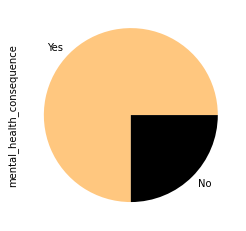

In [9]:
dataframe3 = final_dataset.query('remote_work == "No" & benefits == "No" & Continents == "SouthAmerica" & seek_help == "No" & care_options == "No"')

dataframe3['mental_health_consequence'].value_counts().plot(kind="pie", colormap="copper_r")

<AxesSubplot:xlabel='Mental Health consequence', ylabel='count'>

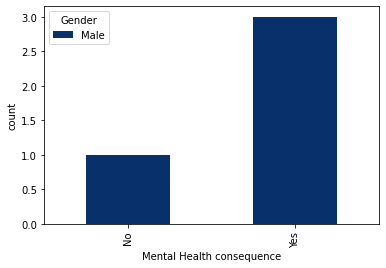

In [10]:
dataframe4=dataframe3.groupby(['mental_health_consequence','Gender']).size()
dataframe4=dataframe4.unstack()
dataframe4.plot(kind='bar', xlabel="Mental Health consequence", ylabel="count", colormap = "Blues_r")

## Analysis on Europe

<AxesSubplot:ylabel='mental_health_consequence'>

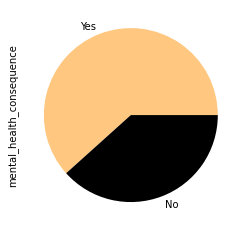

In [11]:
dataframe5 = final_dataset.query('remote_work == "No" & benefits == "No" & Continents == "Europe" & seek_help == "No" & care_options == "No"')

dataframe5['mental_health_consequence'].value_counts().plot(kind="pie", colormap="copper_r")

<AxesSubplot:xlabel='Mental Health consequence', ylabel='count'>

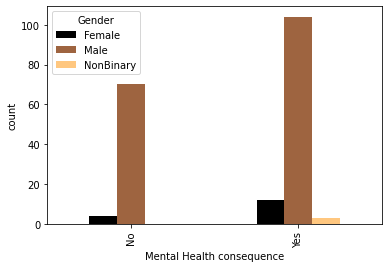

In [12]:
dataframe6=dataframe5.groupby(['mental_health_consequence','Gender']).size()
dataframe6=dataframe6.unstack()
dataframe6.plot(kind='bar', xlabel="Mental Health consequence", ylabel="count", colormap = "copper")